In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# Step 1: Load the land cover map (assuming DN values represent 5 classes)
landcover_image_path = '/home/jovyan/shared/PCN/ALOS-2/LULC/2007_2020_HV_classified_alos2_image.tif'

with rasterio.open(landcover_image_path) as src:
    landcover = src.read(1)  # Read the first band of the image

In [3]:
# Step 2: Define class labels and corresponding DN values
class_labels = {
    1: 'Waterbody',
    2: 'Vegetation',
    3: 'Oil Palm',
    4: 'Bareland',
    5: 'Built-up'
}

# Step 3: Define colors for each class
class_colors = {
    1: '#0000ff',  # Blue for waterbody
    2: '#00ff00',  # Green for vegetation
    3: '#ffcc00',  # Tan for bare land
    4: '#d2b48c',  # Yellow for Oil palm
    5: '#808080'   # Gray for built-up
}

# Create a colormap from the class colors
cmap = mcolors.ListedColormap([class_colors[cls] for cls in sorted(class_colors.keys())])

In [4]:
# Step 4: Normalize the DN values for correct color mapping
norm = mcolors.BoundaryNorm(boundaries=np.arange(1, 7), ncolors=len(class_colors))

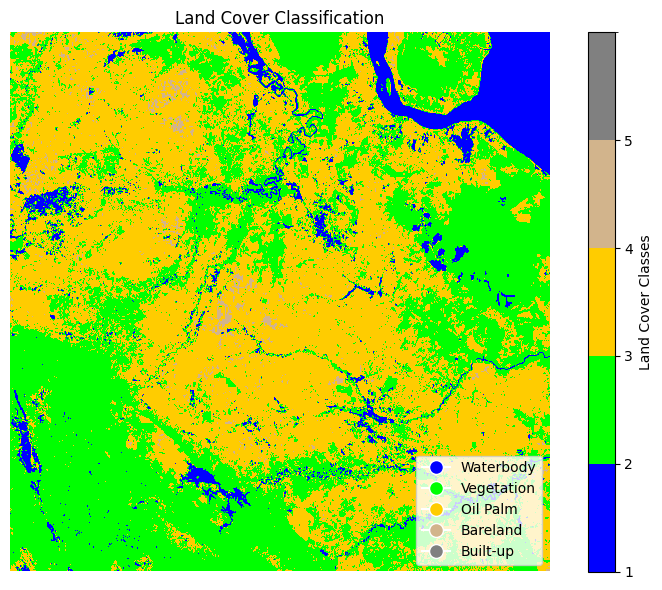

In [7]:
# Step 5: Plot the land cover map
plt.figure(figsize=(8, 6))
plt.imshow(landcover, cmap=cmap, norm=norm)
plt.colorbar(ticks=np.arange(1, 6), label='Land Cover Classes')

# Step 6: Customize the plot
plt.title('Land Cover Classification')
plt.axis('off')

# Add a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=class_colors[cls], markersize=10, label=class_labels[cls]) 
           for cls in sorted(class_labels.keys())]

plt.legend(handles=handles, loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()
